In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import simulation_processes.simulator as tsim
import os


### T-PoP, Threshold = 100%, Number of Simulations = 100, 1000 Agents, depth 2, 2 witnesses per depth

### Plots for absolute values of True Positives, True Negatives, False Positives and False Negatives

In [6]:
directory_pathfile = '/Users/amm3117/Desktop/Tree-Proof-Of-Position-V2/simulations/depth_2_neighbours_2/'

dataset = tsim.full_csv(directory_pathfile)
simulations = pd.DataFrame(dataset)



In [10]:
simulations.shape

(1705, 15)

In [7]:
simulations

,Unnamed: 0,Simulation number,Probability of honest cars,Probability of coerced cars,Density,Threshold,Accuracy,True Positives,True Negatives,False Positives,False Negatives,Percent True Positives,Percent True Negatives,Percent False Positives,Percent False Negatives
0,0,0,1.0,0.9,750.0,1.0,99.733333,2992,0,0,8,99.733333,0.000000,100.000000,0.266667
1,1,1,1.0,0.9,750.0,1.0,99.733333,2992,0,0,8,99.733333,0.000000,100.000000,0.266667
2,2,2,1.0,0.9,750.0,1.0,99.600000,2988,0,0,12,99.600000,0.000000,100.000000,0.400000
3,3,3,1.0,0.9,750.0,1.0,99.766667,2993,0,0,7,99.766667,0.000000,100.000000,0.233333
4,4,4,1.0,0.9,750.0,1.0,99.566667,2987,0,0,13,99.566667,0.000000,100.000000,0.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0.8,0.8,750.0,1.0,79.533333,2384,2,606,8,99.665552,0.328947,99.671053,0.334448
1,1,1,0.8,0.8,750.0,1.0,79.533333,2385,1,607,7,99.707358,0.164474,99.835526,0.292642
2,2,2,0.8,0.8,750.0,1.0,79.466667,2382,2,606,10,99.581940,0.328947,99.671053,0.418060
3,3,3,0.8,0.8,750.0,1.0,79.400000,2381,1,607,11,99.540134,0.164474,99.835526,0.459866


[[ 0.          0.          0.        ]
 [ 0.          0.1         0.        ]
 [ 0.          0.2         0.        ]
 [ 0.          0.3         0.        ]
 [ 0.          0.4         0.        ]
 [ 0.          0.5         0.        ]
 [ 0.          0.6         0.        ]
 [ 0.          0.7         0.        ]
 [ 0.          0.8         0.        ]
 [ 0.          0.9         0.        ]
 [ 0.          1.          0.        ]
 [ 0.1         0.         99.85964912]
 [ 0.1         0.1        99.86842105]
 [ 0.1         0.2        99.71731449]
 [ 0.1         0.3        99.28571429]
 [ 0.1         0.4        99.56386293]
 [ 0.1         0.5        99.79591837]
 [ 0.1         0.6        99.71223022]
 [ 0.1         0.7        99.7080292 ]
 [ 0.1         0.8        99.57597173]
 [ 0.1         0.9        99.64539007]
 [ 0.1         1.         99.59537572]
 [ 0.2         0.         99.7704918 ]
 [ 0.2         0.1        99.68309859]
 [ 0.2         0.2        99.89761092]
 [ 0.2         0.3       

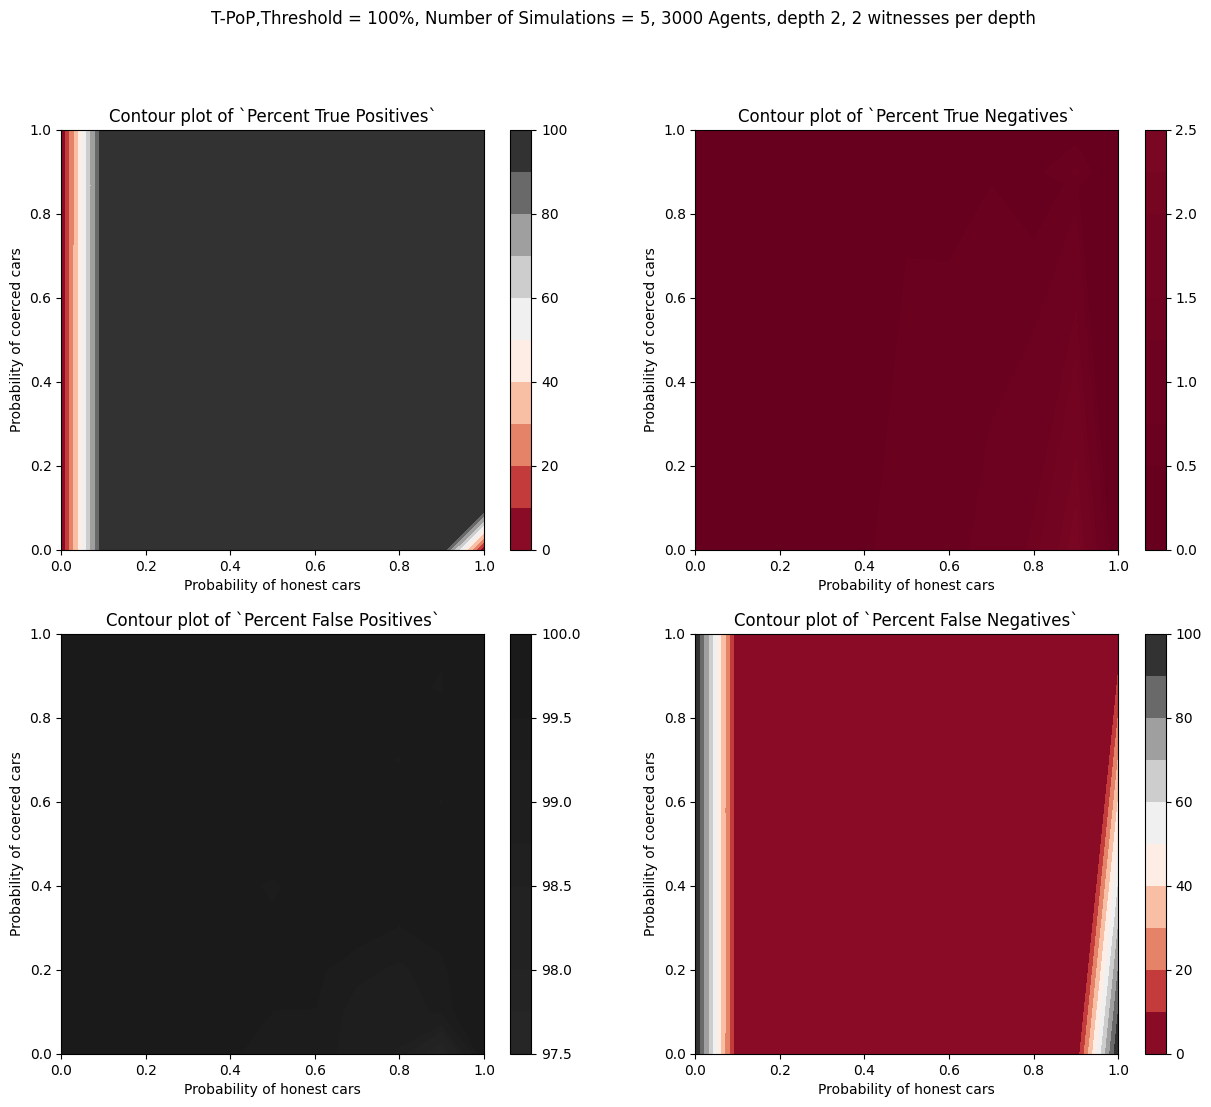

In [5]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))


fig.suptitle('T-PoP,Threshold = 100%, Number of Simulations = 5, 3000 Agents, depth 2, 2 witnesses per depth')
directory_pathfile = '/Users/amm3117/Desktop/Tree-Proof-Of-Position-V2/simulations/depth_2_neighbours_2/'
dataset = tsim.full_csv(directory_pathfile)

vars = ['Percent True Positives', 'Percent True Negatives', 'Percent False Positives', 'Percent False Negatives']
simulations = pd.DataFrame(dataset)
for i, ax in enumerate(axes.flat):
    
    z = vars[i]
    x = 'Probability of honest cars'
    y = 'Probability of coerced cars'


    df_temp = simulations[[x, y, z]].reset_index(drop=True)
    df_temp = df_temp.groupby([x, y]).mean().reset_index()
    #print(df_temp.sort_values([x, y]))
    print(df_temp.values)
    xlist = df_temp[x].values
    ylist = df_temp[y].values
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(X.shape)
    print('here',X)
    #for each FP that equals 0, set it to a very small value below 1/1000 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z_val = df_temp[z][
                (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
            ]
            if z_val.empty:
                Z[i, j] = None

            else:
                Z[i, j] = z_val
    
    cp = ax.contourf(X, Y, Z, vmin = 0.000000, vmax = 100, cmap='RdGy', levels = 10)
    
    ax.set_title(f'Contour plot of `{z}`')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.colorbar(cp, ax=ax)
#fig.colorbar(cp)

ax = fig.get_figure()
#ax.savefig(directory_pathfile +'\\full_data.csv' + '\\plots' + 'subplots.png')

i 0 z Percent True Positives
i 1 z Percent True Negatives
i 2 z Percent False Positives
i 3 z Percent False Negatives


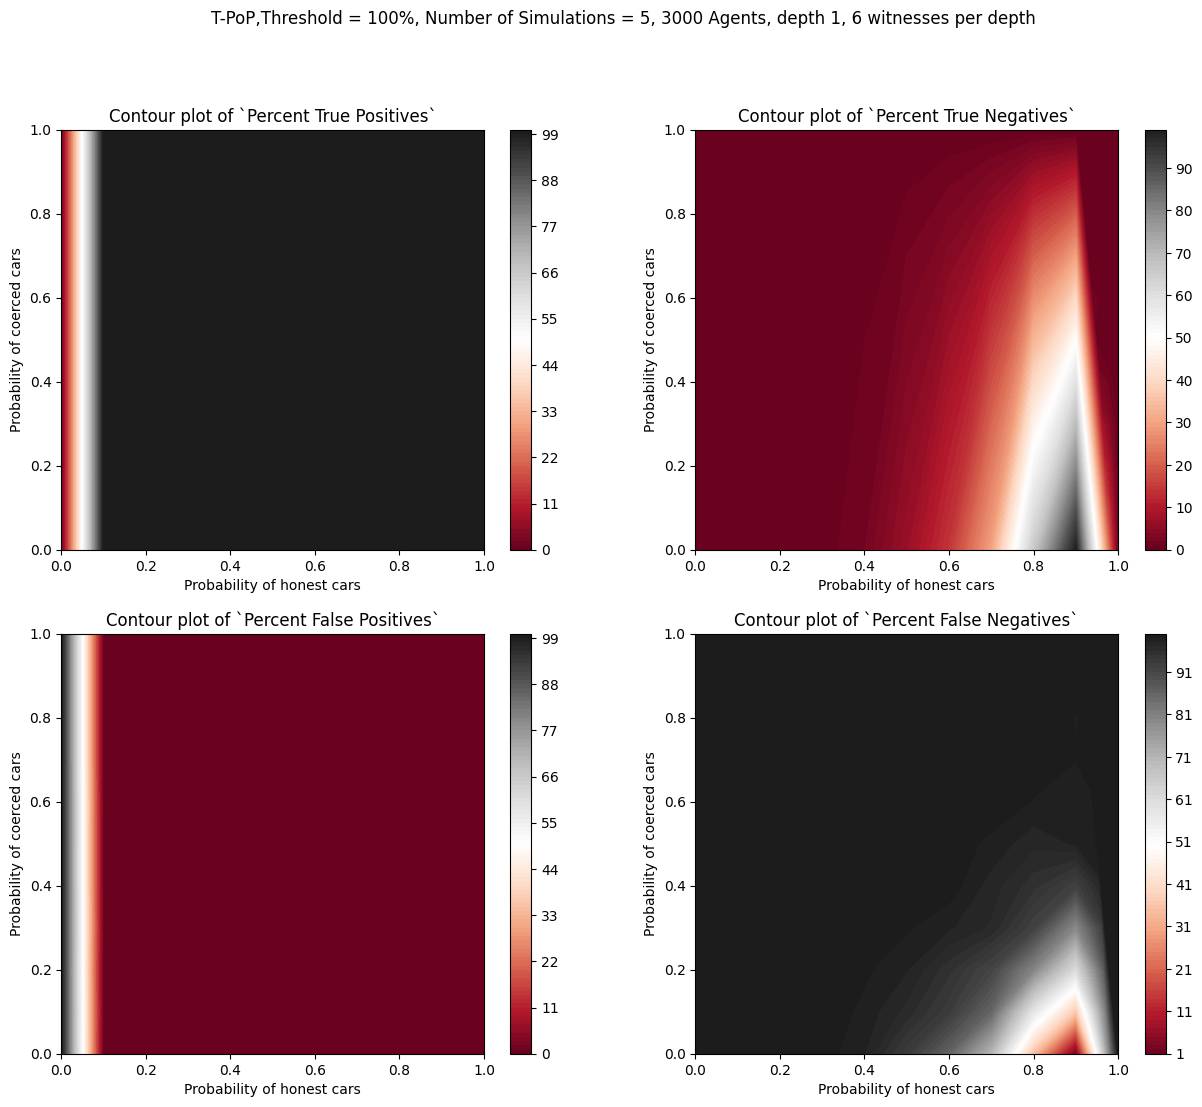

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))


fig.suptitle('T-PoP,Threshold = 100%, Number of Simulations = 5, 3000 Agents, depth 1, 6 witnesses per depth')

directory_pathfile = '/Users/amm3117/Desktop/Tree-Proof-Of-Position-V2/simulations/depth_1_neighbours_6/'

dataset = tsim.full_csv(directory_pathfile)
simulations = pd.DataFrame(dataset)# loading dataset

vars = ['Percent True Positives', 'Percent True Negatives', 'Percent False Positives', 'Percent False Negatives']
for i, ax in enumerate(axes.flat):
    print('i', i, 'z', vars[i])
    z = vars[i]

    x = 'Probability of honest cars'
    y = 'Probability of coerced cars'


    df_temp = simulations[[x, y, z]].reset_index(drop=True)
    df_temp = df_temp.groupby([x, y]).mean().reset_index()

    xlist = df_temp[x].values
    ylist = df_temp[y].values
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(X.shape)
    #for each FP that equals 0, set it to a very small value below 1/1000 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z_val = df_temp[z][
                (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
            ]
            if z_val.empty:
                Z[i, j] = None

            else:
                Z[i, j] = z_val
    
    cp = ax.contourf(X, Y, Z, vmin = 0.000000, vmax = 100, cmap='RdGy', levels = 100)
    
    ax.set_title(f'Contour plot of `{z}`')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.colorbar(cp, ax=ax)
#fig.colorbar(cp)

ax = fig.get_figure()
#ax.savefig(directory_pathfile +'\\full_data.csv' + '\\plots' + 'subplots.png')

[[ 0.          0.          0.        ]
 [ 0.          0.1         0.        ]
 [ 0.          0.2         0.        ]
 [ 0.          0.3         0.        ]
 [ 0.          0.4         0.        ]
 [ 0.          0.5         0.        ]
 [ 0.          0.6         0.        ]
 [ 0.          0.7         0.        ]
 [ 0.          0.8         0.        ]
 [ 0.          0.9         0.        ]
 [ 0.          1.          0.        ]
 [ 0.1         0.         99.0070922 ]
 [ 0.1         0.1        97.19626168]
 [ 0.1         0.2        96.67731629]
 [ 0.1         0.3        96.82432432]
 [ 0.1         0.4        95.77922078]
 [ 0.1         0.5        94.4       ]
 [ 0.1         0.6        92.47457627]
 [ 0.1         0.7        91.04895105]
 [ 0.1         0.8        87.78156997]
 [ 0.1         0.9        86.95081967]
 [ 0.1         1.         81.57706093]
 [ 0.2         0.         96.8718802 ]
 [ 0.2         0.1        97.8369906 ]
 [ 0.2         0.2        95.97972973]
 [ 0.2         0.3       

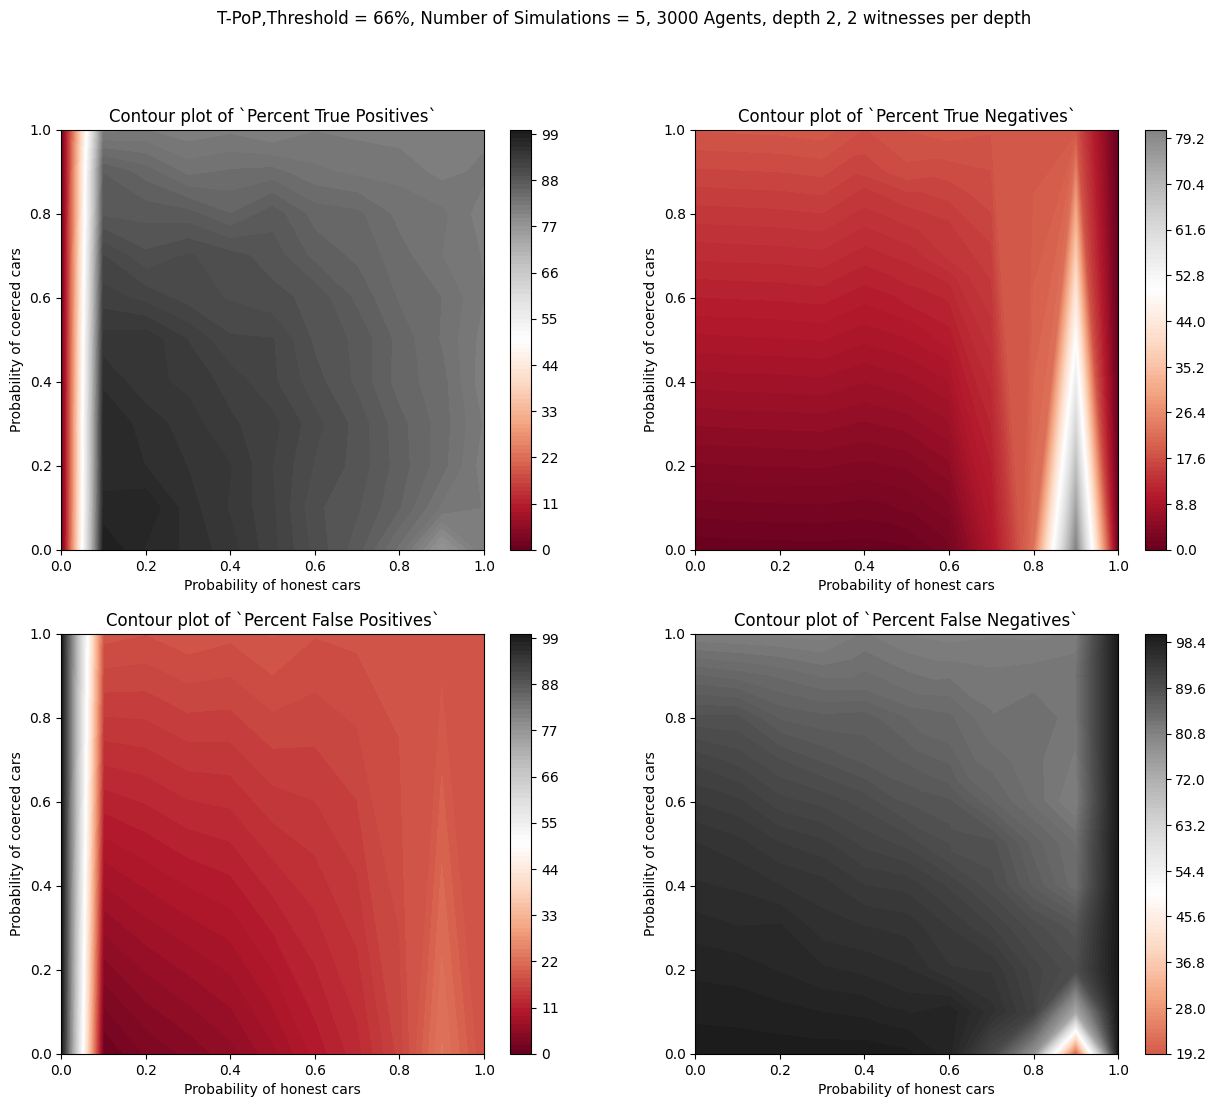

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))


fig.suptitle('T-PoP,Threshold = 66%, Number of Simulations = 5, 3000 Agents, depth 2, 2 witnesses per depth')
directory_pathfile = '/Users/amm3117/Desktop/Tree-Proof-Of-Position-V2/simulations/depth_2_neighbours_2threshold066/'
dataset = tsim.full_csv(directory_pathfile)

vars = ['Percent True Positives', 'Percent True Negatives', 'Percent False Positives', 'Percent False Negatives']
simulations = pd.DataFrame(dataset)
for i, ax in enumerate(axes.flat):
    
    z = vars[i]
    x = 'Probability of honest cars'
    y = 'Probability of coerced cars'


    df_temp = simulations[[x, y, z]].reset_index(drop=True)
    df_temp = df_temp.groupby([x, y]).mean().reset_index()
    #print(df_temp.sort_values([x, y]))
    print(df_temp.values)
    xlist = df_temp[x].values
    ylist = df_temp[y].values
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(X.shape)
    print('here',X)
    #for each FP that equals 0, set it to a very small value below 1/1000 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z_val = df_temp[z][
                (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
            ]
            if z_val.empty:
                Z[i, j] = None

            else:
                Z[i, j] = z_val
    
    cp = ax.contourf(X, Y, Z, vmin = 0.000000, vmax = 100, cmap='RdGy', levels = 100)
    
    ax.set_title(f'Contour plot of `{z}`')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.colorbar(cp, ax=ax)
#fig.colorbar(cp)

ax = fig.get_figure()
#ax.savefig(directory_pathfile +'\\full_data.csv' + '\\plots' + 'subplots.png')

[[  0.           0.           0.        ]
 [  0.           0.1          0.        ]
 [  0.           0.2          0.        ]
 [  0.           0.3          0.        ]
 [  0.           0.4          0.        ]
 [  0.           0.5          0.        ]
 [  0.           0.6          0.        ]
 [  0.           0.7          0.        ]
 [  0.           0.8          0.        ]
 [  0.           0.9          0.        ]
 [  0.           1.           0.        ]
 [  0.1          0.         100.        ]
 [  0.1          0.1         99.69879518]
 [  0.1          0.2        100.        ]
 [  0.1          0.3        100.        ]
 [  0.1          0.4        100.        ]
 [  0.1          0.5        100.        ]
 [  0.1          0.6         99.28057554]
 [  0.1          0.7        100.        ]
 [  0.1          0.8        100.        ]
 [  0.1          0.9        100.        ]
 [  0.1          1.         100.        ]
 [  0.2          0.         100.        ]
 [  0.2          0.1        100.  

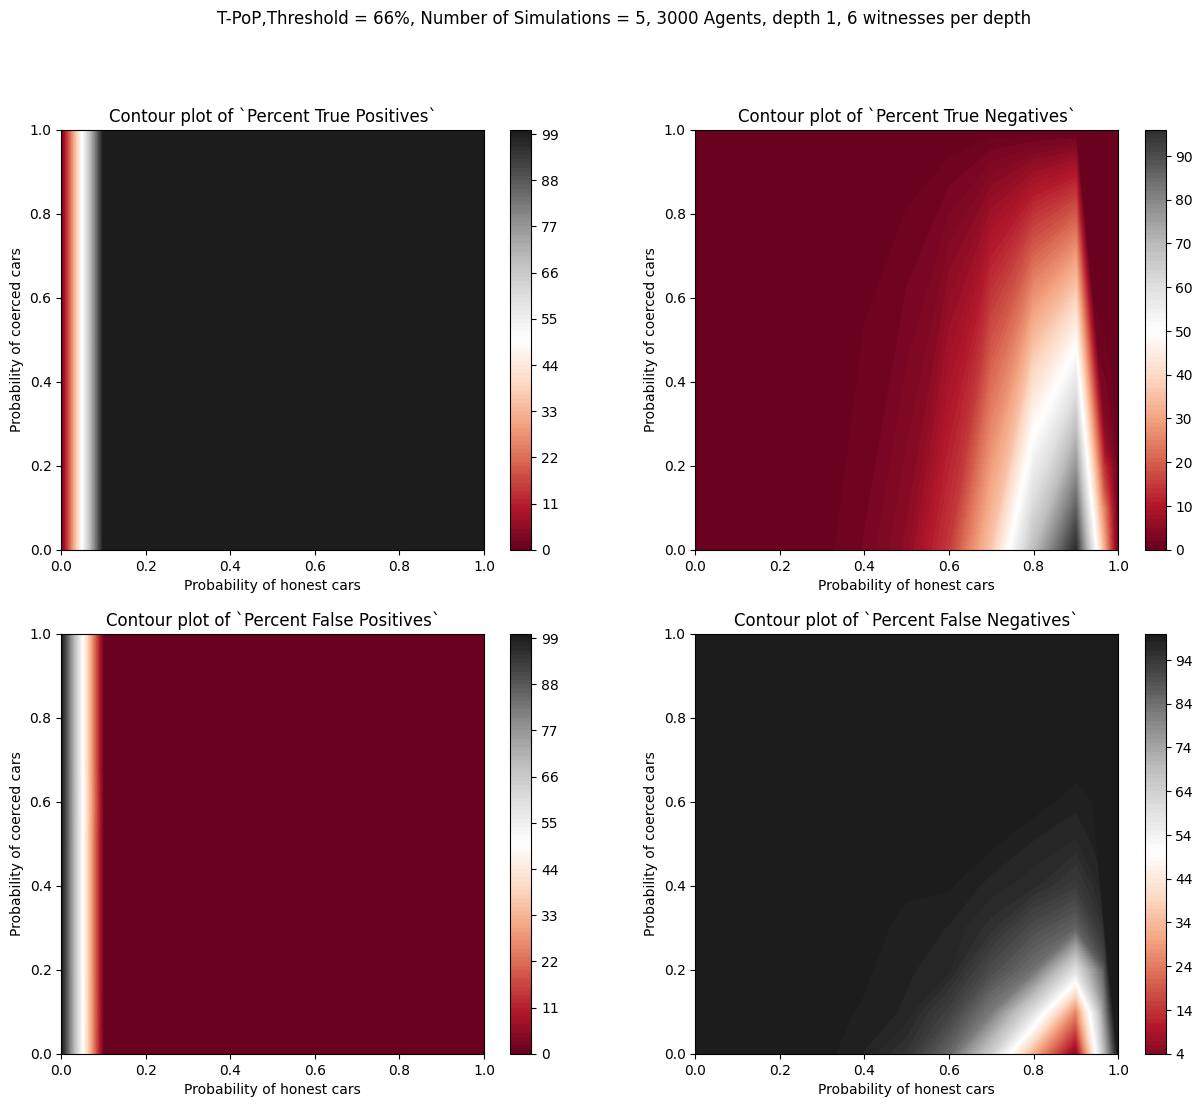

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,12))


fig.suptitle('T-PoP,Threshold = 66%, Number of Simulations = 5, 3000 Agents, depth 1, 6 witnesses per depth')
directory_pathfile = '/Users/amm3117/Desktop/Tree-Proof-Of-Position-V2/simulations/depth_1_neighbours_6threshold066/'
dataset = tsim.full_csv(directory_pathfile)

vars = ['Percent True Positives', 'Percent True Negatives', 'Percent False Positives', 'Percent False Negatives']
simulations = pd.DataFrame(dataset)
for i, ax in enumerate(axes.flat):
    
    z = vars[i]
    x = 'Probability of honest cars'
    y = 'Probability of coerced cars'


    df_temp = simulations[[x, y, z]].reset_index(drop=True)
    df_temp = df_temp.groupby([x, y]).mean().reset_index()
    #print(df_temp.sort_values([x, y]))
    print(df_temp.values)
    xlist = df_temp[x].values
    ylist = df_temp[y].values
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros(X.shape)
    print('here',X)
    #for each FP that equals 0, set it to a very small value below 1/1000 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z_val = df_temp[z][
                (df_temp[y] == Y[i, j]) & (df_temp[x] == X[i, j])
            ]
            if z_val.empty:
                Z[i, j] = None

            else:
                Z[i, j] = z_val
    
    cp = ax.contourf(X, Y, Z, vmin = 0.000000, vmax = 100, cmap='RdGy', levels = 100)
    
    ax.set_title(f'Contour plot of `{z}`')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.colorbar(cp, ax=ax)
#fig.colorbar(cp)

ax = fig.get_figure()
#ax.savefig(directory_pathfile +'\\full_data.csv' + '\\plots' + 'subplots.png')